In [ ]:
!pip install chembl_webresource_client

In [ ]:

# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)

In [ ]:
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [ ]:
selected_target = targets.target_chembl_id[7]
selected_target

'CHEMBL4523582'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id = selected_target).filter(standard_type='IC50')

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.shape

(117, 45)

In [ ]:
df['standard_value'].tolist()

In [ ]:
dfx = df[df.standard_value.notnull()].copy()

In [ ]:
dfx.shape

(117, 45)

In [ ]:
dfx

In [ ]:
filename = 'bioactivity_data_raw_'+selected_target+'.csv'
df.to_csv(filename, index=False)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CHEMBL4523582_raw.csv to CHEMBL4523582_raw.csv


In [ ]:
selected_target = 'CHEMBL4523582'

In [ ]:
filepath = '/content/'+list(uploaded.keys())[0]
filepath

'/content/CHEMBL4523582_raw.csv'

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df.shape

(8700, 45)

In [ ]:
df2 = df[df.Standard_Value.notna()]
df2 = df[df.Smiles.notna()]

In [ ]:
df2[df2.Standard_Value.notnull()]

In [ ]:
df2 = df2[df.Standard_Value.notnull()]
df2 = df2[df.Smiles.notnull()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
df.shape

(267, 45)

#Labeling compounds as either being active, inactive or intermediate


The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [ ]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [ ]:
len(bioactivity_class)

133

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]

In [ ]:
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0
...,...,...,...
210,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0
211,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0
212,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0
213,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0


In [ ]:
df3.shape

(133, 3)

In [ ]:
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0


In [ ]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
print(len(bioactivity_class))
df4 = pd.concat([df3, bioactivity_class], axis=1)
print(df4.shape)
df4

214
(215, 4)


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0,inactive
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0,inactive
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0,inactive
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0,inactive
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0,inactive
...,...,...,...,...
210,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0,intermediate
211,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0,intermediate
212,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0,intermediate
213,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0,intermediate


In [ ]:
df4 = df4[df4['canonical_smiles'].isnull()==False].copy()
print(df4.shape)

(214, 4)


In [ ]:
df4.shape

(214, 4)

In [ ]:
filename = 'bioactivity_data_preprocessed_'+ selected_target+'.csv'
df4.to_csv(filename, index=False)

# Part 2: Exploratory Data Analysis

In [ ]:
df_no_smiles = df4.drop(columns='canonical_smiles')
df_no_smiles.shape

In [ ]:
df_no_smiles

In [ ]:
for i in df_no_smiles['molecule_chembl_id']:
  print(i)

In [ ]:
smiles = []

for i in df4.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
smiles

In [ ]:
#df_clean_smiles = pd.concat([df_no_smiles,smiles], axis = 1)
df_clean_smiles = df_no_smiles
for i in range(len(df_no_smiles)):
  df_clean_smiles['canonical_smiles'] = smiles[i]
#df_clean_smiles.head()
print(df_clean_smiles.shape)
#print(df_clean_smiles.iloc[213])
#df_clean_smiles = df_clean_smiles[df_clean_smiles['canonical_smiles'].isnull()==False]
#print(df_clean_smiles.shape)

In [ ]:
df_clean_smiles

#Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton

Octanol-water partition coefficient (LogP) < 5

Hydrogen bond donors < 5

Hydrogen bond acceptors < 10

In [ ]:

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

***Calculate descriptors***

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
    #print(moldata)
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
        #print(row)
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1  
        #print(i)    
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df.Smiles)

In [ ]:
#df_combined = df_clean_smiles
#for i in range(len(df_clean_smiles)):
#  df_clean_smiles['MW'] = df_lipinski['MW'][i]
#  df_clean_smiles['LogP'] = df_lipinski['LogP'][i]
#  df_clean_smiles['NumHDonors'] = df_lipinski['NumHDonors'][i]
#  df_clean_smiles['NumHAcceptors'] = df_lipinski['NumHAcceptors'][i]
df_combined = pd.concat([df,df_lipinski], axis=1)
print(df_combined.shape)


(8700, 49)


In [ ]:
fname = selected_target+'_bioactivity_lipinski.csv'
df_combined.to_csv(fname)

# Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10$^{-9}$

Take the molar value and apply -log10

Delete the standard_value column and create a new pIC50 column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = float(i)*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if float(i) > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
#df_combined = df_combined['standard_value'].astype(float)
df_norm = norm_value(df_combined)
df_norm

In [ ]:

df_norm.standard_value_norm.describe()

In [ ]:
df_final = pIC50(df_norm)
df_final

In [ ]:
df_final

In [ ]:
df_final.iloc[99,]

In [ ]:
df_final.pIC50.describe()

In [ ]:
fname = selected_target+'_bioactivity_lipinski.csv'
df_final.to_csv(fname)

In [ ]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class.head()

In [ ]:
df_2class.shape

(67, 8)

In [ ]:
fname = selected_target+'_bioactivity_data_2class_pIC50.csv'
df_2class.to_csv(fname)

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [ ]:

!pip install lux-api

     |████████████████████████████████| 123 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.5 MB 45.5 MB/s 
     |████████████████████████████████| 812 kB 29.3 MB/s 
     |████████████████████████████████| 24.8 MB 1.8 MB/s 
     |████████████████████████████████| 11.2 MB 40.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 45 kB 1.9 MB/s 
     |████████████████████████████████| 9.9 MB 25.4 MB/s 
     |████████████████████████████████| 9.9 MB 38.4 MB/s 
     |████████████████████████████████| 121 kB 52.5 MB/s 
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 133 kB 52.0 MB/s 
     |████████████████████████████████| 72 kB 848 kB/s 
     |████████████████████████████████| 306 kB 34.3 MB/s 
     |████████████████████████████████| 1.1 MB 55.8 MB/s 
     |████

In [ ]:
df_2class

,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,active,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21,224.287,1.9819,2.0,2.0,6.408935
1,CHEMBL178459,active,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21,224.287,1.9819,2.0,2.0,6.677781
2,CHEMBL3545157,active,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21,224.287,1.9819,2.0,2.0,7.096910
4,CHEMBL4303595,active,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21,224.287,1.9819,2.0,2.0,7.397940
6,CHEMBL55400,active,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21,224.287,1.9819,2.0,2.0,6.443697
...,...,...,...,...,...,...,...,...
105,CHEMBL477197,active,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21,224.287,1.9819,2.0,2.0,6.657577
107,CHEMBL1449651,active,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21,224.287,1.9819,2.0,2.0,6.677781
108,CHEMBL3545157,active,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21,224.287,1.9819,2.0,2.0,6.823909
109,CHEMBL178459,active,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21,224.287,1.9819,2.0,2.0,6.207608


In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

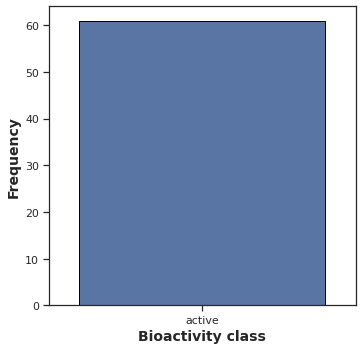

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

## Scatter plot of MW versus LogP

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

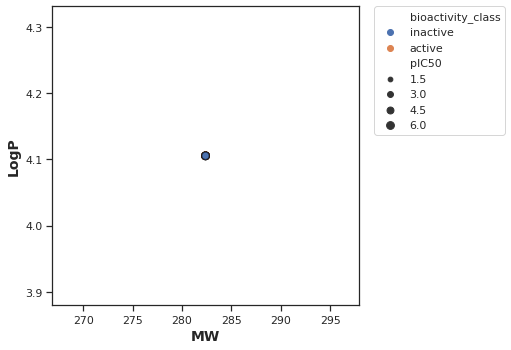

In [ ]:

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

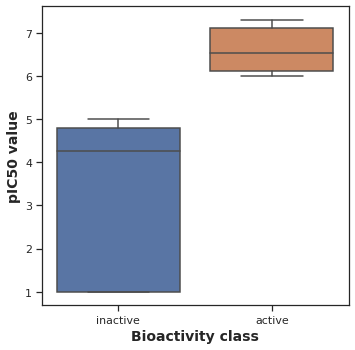

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

## Statistical analysis | Mann-Whitney U Test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.662636e-10,0.05,Different distribution (reject H0)


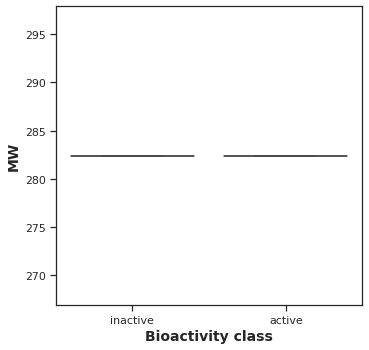

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

ValueError: ignored

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

In [ ]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

# Interpretation of Statistical Results

**Box Plots **

**pIC50 values**

Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

**Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: bioactivity_data_raw_CHEMBL3927.csv (deflated 90%)
  adding: bioactivity_data_preprocessed_CHEMBL3927.csv (deflated 80%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: CHEMBL3927_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: CHEMBL3927_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 15%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: bioactivity_data_raw.csv (deflated 90%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)


# Part 3:  Descriptor Calculation and Dataset Preparation

we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building in Part 4.

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [ ]:
! unzip padel.zip

In [ ]:
#import lux
from google.colab import files
uploaded2 = files.upload()
filepath2 = '/content/'+list(uploaded2.keys())[0]
df3 = pd.read_csv(filepath2)
df3

In [ ]:
df3 = pd.read_csv(filepath)
df3.shape

(8700, 45)

In [ ]:
selection = ['Smiles','Molecule ChEMBL ID']
df3_selection = df3[selection] 
df3_selection.head()

,Smiles,Molecule ChEMBL ID
0,Cl.O.c1ccc2c(c1)CN1CCCC1=N2,CHEMBL2163792
1,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N\Nc1cccc(-c2cc...,CHEMBL461101
2,COc1cc([C@@H]2c3cc4c(cc3[C@@H](O[C@@H]3O[C@@H]...,CHEMBL44657
3,Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnn(C(C)(C)C(N)=O)c...,CHEMBL2387080
4,COc1c(C)c2c(c(O)c1C/C=C(\C)CCC(=O)O)C(=O)OC2,CHEMBL866


In [ ]:
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

Cl.O.c1ccc2c(c1)CN1CCCC1=N2	CHEMBL2163792
CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N\Nc1cccc(-c2cccc(C(=O)O)c2)c1O	CHEMBL461101
COc1cc([C@@H]2c3cc4c(cc3[C@@H](O[C@@H]3O[C@@H]5CO[C@@H](C)O[C@H]5[C@H](O)[C@H]3O)[C@H]3COC(=O)[C@H]23)OCO4)cc(OC)c1O	CHEMBL44657
Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnn(C(C)(C)C(N)=O)c4)cc2OCC3)n(C(C)C)n1	CHEMBL2387080
COc1c(C)c2c(c(O)c1C/C=C(\C)CCC(=O)O)C(=O)OC2	CHEMBL866


In [ ]:
! cat molecule.smi | wc -l

8700


# Calculate fingerprint descriptors

##Calculate PaDEL descriptors

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Streaming output truncated to the last 5000 lines.
Processing CHEMBL570015 in molecule.smi (3702/8700). Average speed: 0.18 s/mol.
Processing CHEMBL4297674 in molecule.smi (3703/8700). Average speed: 0.18 s/mol.
Processing CHEMBL2419706 in molecule.smi (3704/8700). Average speed: 0.18 s/mol.
Processing CHEMBL1583199 in molecule.smi (3705/8700). Average speed: 0.18 s/mol.
Processing CHEMBL228654 in molecule.smi (3706/8700). Average speed: 0.18 s/mol.
Processing CHEMBL3351077 in molecule.smi (3707/8700). Average speed: 0.18 s/mol.
Processing CHEMBL474133 in molecule.smi (3708/8700). Average speed: 0.18 s/mol.
Processing CHEMBL230006 in molecule.smi (3709/8700). Average speed: 0.18 s/mol.
Processing CHEMBL286204 in molecule.smi (3710/8700). Average speed: 0.18 s/mol.
Processing CHEMBL17860 in molecule.smi (3711/8700). Average speed: 0.18 s/mol.
Processing CHEMBL4169078 in molecule.smi (3712/8700). Average speed: 0.18 s/mol.
Processing CHEMBL1201127 in molecule.smi (3713/8700). Average spe

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df3_X.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2163792,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL461101,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL44657,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL2387080,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL866,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])

In [ ]:
df3_X.shape

(8700, 881)

In [ ]:
df3_Y = df3['pIC50']
df3_Y

KeyError: ignored

In [ ]:

dataset3 = pd.concat([df, df3_X], axis=1)
dataset3

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2163792,DESOXYPEGANINE HYDROCHLORIDE HYDRATE,0,226.71,0,2.33,Desoxypeganine,Cl.O.c1ccc2c(c1)CN1CCCC1=N2,Inhibition,'=',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL461101,ELTROMBOPAG,4,442.48,0,4.56,eltrombopag,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N\Nc1cccc(-c2cc...,Inhibition,'=',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL44657,ETOPOSIDE,4,588.56,2,1.34,ETOPOSIDE,COc1cc([C@@H]2c3cc4c(cc3[C@@H](O[C@@H]3O[C@@H]...,Inhibition,'=',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL2387080,TASELISIB,3,460.54,0,3.17,TASELISIB,Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnn(C(C)(C)C(N)=O)c...,Inhibition,'=',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL866,MYCOPHENOLIC ACID,4,320.34,0,2.73,MYCOPHENOLIC_acid,COc1c(C)c2c(c(O)c1C/C=C(\C)CCC(=O)O)C(=O)OC2,Inhibition,'=',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,CHEMBL959,RIMANTADINE,4,179.31,0,2.55,RIMANTADINE,CC(N)C12CC3CC(CC(C3)C1)C2,Inhibition,'=',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8696,CHEMBL258805,SU-9516,1,241.25,0,1.91,SU9516,COc1ccc2c(c1)/C(=C/c1cnc[nH]1)C(=O)N2,Inhibition,'=',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8697,CHEMBL3545083,RGB-286638,1,545.64,1,2.42,RGB-286638,COCCN1CCN(Cc2ccc(-c3n[nH]c4c3C(=O)c3c(NC(=O)NN...,Inhibition,'=',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8698,CHEMBL3105836,NaN,0,260.30,0,3.53,PFK-015,O=C(/C=C/c1ccc2ccccc2n1)c1ccncc1,Inhibition,'=',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
fname = selected_target+'_bioactivity_padel.csv'
dataset3.to_csv(fname, index=False)

In [ ]:
dataset3.shape

(8700, 926)

# Part 4: Regression Models with Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = dataset3.drop(['pIC50','Name'], axis=1)

In [ ]:
Y = dataset3.pIC50

In [ ]:
X.shape

(133, 881)

In [ ]:
Y.shape

(133,)

Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

ValueError: ignored

In [ ]:
X.shape

(133, 881)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, y_train.shape

((106, 881), (106,))

In [ ]:
X_test.shape, y_test.shape

((27, 881), (27,))

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
r2

-0.014263144482729473

In [ ]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

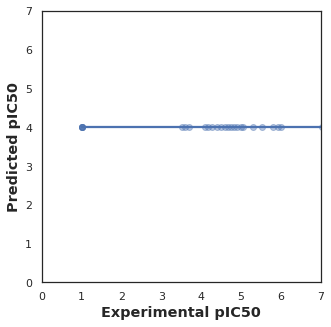

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 7)
ax.set_ylim(0, 7)
ax.figure.set_size_inches(5, 5)
plt.show

#Part 5: Comparing Regressors

In [ ]:
! pip install lazypredict

     |████████████████████████████████| 10.1 MB 25.7 MB/s 
     |████████████████████████████████| 82 kB 921 kB/s 
     |████████████████████████████████| 72 kB 878 kB/s 
     |████████████████████████████████| 269 kB 62.1 MB/s 
     |████████████████████████████████| 1.2 MB 51.4 MB/s 
     |████████████████████████████████| 6.8 MB 44.1 MB/s 
     |████████████████████████████████| 25.9 MB 1.5 MB/s 
     |████████████████████████████████| 127.6 MB 20 kB/s 
     |████████████████████████████████| 248 kB 45.9 MB/s 
     |████████████████████████████████| 14.5 MB 46.7 MB/s 
     |████████████████████████████████| 302 kB 65.5 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 98 kB 7.4 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=393700 sha256=7ae585b765558feda683808577c1e80d8b49f8b1dc67ca22e1aa89f420450053
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

ModuleNotFoundError: ignored

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)


In [ ]:
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:

# Performance table of the training set (80% subset)
predictions_train

In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


[(0.0, 1.0)]

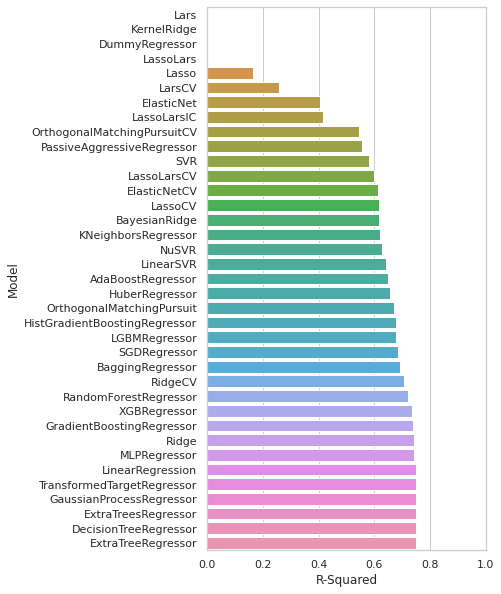

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

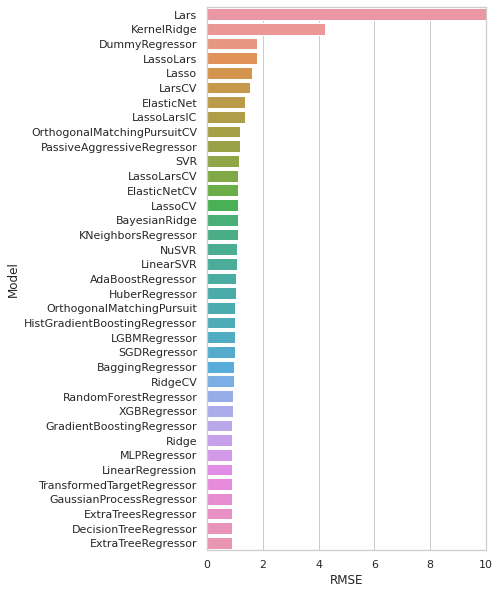

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

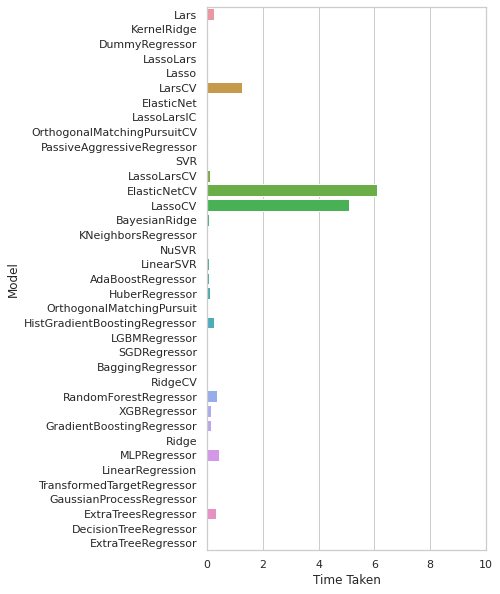

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

#EDA


In [ ]:
from google.colab import files
uploaded = files.upload()